# Gradient Descent

## Vanilla Gradient Descent
Gradient descent is an optimization algorithm that aims to find the minimum of a function. In machine learning, this is typically optimizing to find the minimum of the loss function. The algorithm achieves this by computing the derivative of the loss with respect to the parameter, and we use this gradient to adjust our parameter. 

We will often want to be adjusting several parameters at a time. We will refer to these as a row vector of parameters, $\theta^T$. We want to compute the slope for each parameter, and move in the negative direction of the slope. So if we make a parameter estimate $\theta_1$, we compute the gradient with respect to loss and move downwards to $\theta_2$. We do this iteratively until we reach the minimum, and this can be expressed as: 

$\theta^+ = \theta^- - \alpha \triangledown_\theta J$

where $\theta^+$ is our new parameter estimate and it equals the old parameter estimate $\theta^-$ minus the learning rate $alpha$ times the gradient of the parameter with respect to the loss $\triangledown_\theta J$. 

In this example, we are going to use linear regression to demonstrate gradient descent. We will use mean squared error as a loss function:

$\text{J}(\theta) = \frac{1}{2m}\Sigma_{i=1}^{m}(\hat{y}_i - y_i)^2$

Thus, our derivative for the loss function with respect to our parameter will be: 

$\frac{dJ}{d\theta} = \frac{1}{2m} \Sigma_{i=1}^m 2(\hat{y}_i - y_i)\frac{d}{d\theta}(\theta^T \bar{x}_{i-\hat{y}_i})$

The fraction and the sum remain the same. The derivative of the bracket is the power (2) times the bracket itself times the derivative of the bracket. The derivative of the bracket that we are producing is from our definition of predicted $y$, $\hat{y} = \theta^T \bar{x}$. Note that this is $x$ bar. We can simplify this: 

$\frac{dJ}{d\theta} = \frac{1}{m} \Sigma_{i=1}^m (\hat{y}_i - y_i)\bar{x}_i$

The derivative of the brackets is essentially $\bar{x}_i$. The 2 denominator and multiplied by the sum cancel out. This gives us the gradient of our cost, $\triangledown_\theta J$, and we can simply keep plugging this in to give us a recursive way to keep updating and reevaluating our parameter values $\theta$ until we converge. 

We will begin our implementation by loading libraries and a dataset. 

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use("fivethirtyeight")
import seaborn as sns 
from sklearn import datasets 
from sklearn.model_selection import train_test_split

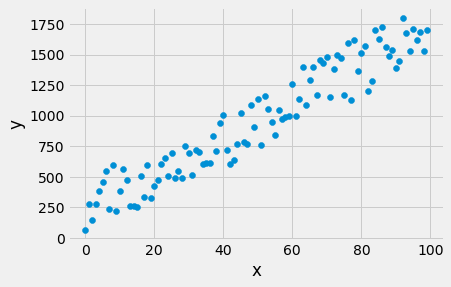

In [10]:
# Simulate data
true_slope = 14.321
true_intercept = 7.2 
input_var = np.arange(0.0, 100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var)) 

x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Load an SKLearn dataset

We will first define the `compute_cost` function, which is $\text{J} = \frac{1}{2m}\Sigma_{i=1}^{m}(\hat{y}_i - y_i)^2$. We will use this function in batch and stochastic gradient descent also. 

In [25]:
def compute_cost(input_var, output_var, params):
    ''' Computes the cost of the linear regression. '''
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        # Make a prediction
        y_hat = np.dot(params, np.array([1.0, x])) # dot product between theta and x bar
        cost_sum += (y - y_hat) ** 2 # Square difference to get cost

    cost = cost_sum / (num_samples * 2.0) 
    
    return cost

## Batch Gradient Descent

Batch gradient descent differs from gradient descent as it . This can be expressed in pseudocode with: 

`FOR j FROM 0 -> max_iteration: `

       FOR i FROM 0 -> m: 

            theta += (alpha / m) * (y[i] - h(x[i])) * x_bar

        ENDLOOP

`ENDLOOP`

This below code starts iterations at zero, we loop over the number of iterations and, in each iteration, we store our parameters and cost. Within this there is another loop that computes our prediction $\hat{y}$, the gradient is computed with $\bar{x} \times \hat{y}$. In this example, we are using the entire dataset as one batch. 

In [32]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    ''' Compute parameters for linear regression using batch gradient descent '''
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)                                     # This will store cost for each iteration
    params_store = np.zeros([2, max_iter])                        # This will store parameters for each iteration
    
    while iteration < max_iter: 

        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params

        print('=======================')
        print(f'Iteration {iteration}\nCost {cost[iteration]}')
        print('=======================')

        for x, y in zip(input_var, output_var):                 # Second loop, loops over x and y values 
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)         # Compute gradient
            params += alpha * gradient / num_samples            # Update parameters based on gradient

        iteration += 1

    return params, cost, params_store

Let's now train our model using the gradient descent we have coded. 

In [37]:
params_theta = np.array([14.0, 7.2]) # Initialise with params values 
alpha = 1e-3 
max_iter = 100

params_hat_batch, cost_batch, params_store_batch = lin_reg_batch_gradient_descent(x_train, y_train, params_theta, alpha, max_iter)

Iteration 0
Cost 201184.87680239082
Iteration 1
Cost 13995.973417870093
Iteration 2
Cost 14126.84444632807
Iteration 3
Cost 14137.802695008659
Iteration 4
Cost 14135.787195298059
Iteration 5
Cost 14133.298440482406
Iteration 6
Cost 14130.794074199634
Iteration 7
Cost 14128.290458791933
Iteration 8
Cost 14125.788178105377
Iteration 9
Cost 14123.287252295613
Iteration 10
Cost 14120.787681381325
Iteration 11
Cost 14118.289464662197
Iteration 12
Cost 14115.79260141257
Iteration 13
Cost 14113.297090906282
Iteration 14
Cost 14110.80293241754
Iteration 15
Cost 14108.310125220878
Iteration 16
Cost 14105.818668591299
Iteration 17
Cost 14103.328561804123
Iteration 18
Cost 14100.839804135088
Iteration 19
Cost 14098.35239486032
Iteration 20
Cost 14095.86633325634
Iteration 21
Cost 14093.381618600037
Iteration 22
Cost 14090.89825016866
Iteration 23
Cost 14088.416227239906
Iteration 24
Cost 14085.935549091824
Iteration 25
Cost 14083.45621500285
Iteration 26
Cost 14080.978224251803
Iteration 27
Cost 

We can look at our parameters and plot them to see how they do on the test set. We will also add a helper function to plot the line given slope and intercept. 

In [57]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

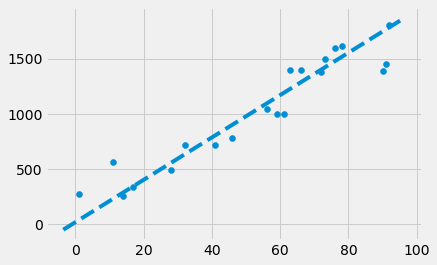

In [58]:
plt.figure()
plt.scatter(x_test, y_test)
abline(params_hat_batch[0], params_hat_batch[1])

plt.show()

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) is an extension of gradient descent which, instead of using the entire dataset to optimize, uses a subset of the dataset $b$ where $b$ is the size of the minibatch. This is more computationally efficient than using the entire dataset. Using $b>1$ gives greater stability to parameters during learning, but as it gets larger it also becomes less efficient. 

You would randomly shuffle your dataset, then loop over your dataset and do gradient descent. In pseudocode, it looks like: 

`shuffle(x,y) `

`FOR i FROM 0 -> m:`

        theta += (alpha / m) * (y[i] - h(x[i])) * x_bar 
    
`ENDLOOP`

Below we implement stochastic gradient descent with the strict implementation where $b=1$. This means that there is one loop. Each time, we give it one datapoint, it computes $\hat{y}$, it computes the loss from this and updates the weights. 

In [83]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    num_samples = len(input_var)
    cost = np.zeros(num_samples)                                     # This will store cost for each iteration
    params_store = np.zeros([2, num_samples])                        # This will store parameters for each iteration
    iteration = 0

    for x, y in zip(input_var, output_var):                 # Loop over data
        cost[iteration] = compute_cost(input_var, output_var, params)
        y_hat = np.dot(params, np.array([1.0, x]))          # Compute y hat
        gradient = np.array([1.0, x]) * (y - y_hat)         # Compute gradient
        params += alpha * gradient / num_samples            # Update parameters based on gradient
        params_store[:, iteration] = params
    
        print('=======================')
        print(f'Iteration {iteration}\nCost {cost[iteration]}')
        print('=======================')

        iteration += 1

    return params, cost, params_store

In [84]:
alpha = 1e-3 
params_theta = np.array([20.0, 80.0])
params_hat, cost, params_store = lin_reg_stoch_gradient_descent(x_train, y_train, params_theta, alpha)

Iteration 0
Cost 6186174.014623361
Iteration 1
Cost 6122222.2114062235
Iteration 2
Cost 5084456.393076005
Iteration 3
Cost 4444826.327285535
Iteration 4
Cost 3407825.372408138
Iteration 5
Cost 3388773.5677259983
Iteration 6
Cost 3157040.1561706914
Iteration 7
Cost 3127480.714979382
Iteration 8
Cost 2808099.6828348306
Iteration 9
Cost 2376934.3886244604
Iteration 10
Cost 2354701.1761125717
Iteration 11
Cost 2356446.762187029
Iteration 12
Cost 2357293.0164169203
Iteration 13
Cost 2158133.565503253
Iteration 14
Cost 2042137.9383163154
Iteration 15
Cost 1834009.0363184598
Iteration 16
Cost 1816803.0897806068
Iteration 17
Cost 1711019.1072480795
Iteration 18
Cost 1299959.5831391434
Iteration 19
Cost 1277903.594955423
Iteration 20
Cost 1261250.0636424818
Iteration 21
Cost 1240288.0329983397
Iteration 22
Cost 1236026.4014075322
Iteration 23
Cost 1231030.0229609874
Iteration 24
Cost 1159857.8450450846
Iteration 25
Cost 1123729.594973972
Iteration 26
Cost 1095393.767856797
Iteration 27
Cost 107

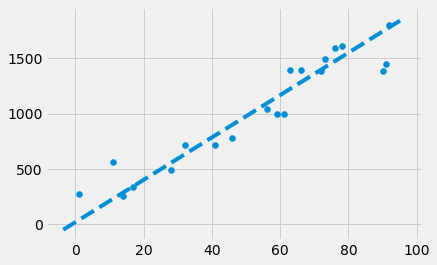

In [70]:
plt.figure()
plt.scatter(x_test, y_test)
abline(params_hat[0], params_hat[1])

plt.show()

## Conclusion
There are different methods for gradient descent. Stochastic gradient descent is often used for linear regression, but with multiple features, it is too inefficient. Using minibatches is better in these cases. 